In [526]:
"""
Quantum Addition Circuit
Kvantový sčítačový obvod

This program simulates a quantum circuit for binary addition using the quantum Fourier transform using Qiskit.

Author: Michal Forgó

Time: 02.12.2025

Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.
Poznámka: Před spuštěním tohoto notebooku se ujistěte, že máte nainstalované requiremnts.txt nebo enviroment.yml.
"""

'\nQuantum Addition Circuit\nKvantový sčítačový obvod\n\nThis program simulates a quantum circuit for binary addition using the quantum Fourier transform using Qiskit.\n\nAuthor: Michal Forgó\n\nTime: 02.12.2025\n\nNote: Ensure you have installed the requirements.txt or environment.yml before running this notebook.\nPoznámka: Před spuštěním tohoto notebooku se ujistěte, že máte nainstalované requiremnts.txt nebo enviroment.yml.\n'

In [527]:
import math
import operator
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT, DraperQFTAdder



In [528]:
'''
while True:
    # Get two binary numbers (max 7 bits)
    # Získejte dvě binární čísla (max 7 bitů)
    firstBinaryNumber = input("Enter a 7-bit or less binary number: ")
    secondBinaryNumber = input("Enter another 7-bit or less binary number: ")

    # Validate input length and that input contains only 1s or 0s
    # Ověření délky vstupu a toho že vstup obsahuje pouze 1 nebo 0
    if len(firstBinaryNumber) > 8 or len(secondBinaryNumber) > 8 or \
    not set(firstBinaryNumber).issubset({'0','1'}) or not set(secondBinaryNumber).issubset({'0','1'}):
        print("Please enter valid inputs. Try again.")  # Error message / Chybová zpráva
    else:
        break  # Exit loop if input is valid / Ukončí smyčku, pokud je vstup platný
'''

# Binary numbers to add
firstBinaryNumber = "1010"  
secondBinaryNumber = "01" 

# Ensure both numbers have the same length
if len(firstBinaryNumber) < len(secondBinaryNumber):
    firstBinaryNumber, secondBinaryNumber = secondBinaryNumber, firstBinaryNumber

secondBinaryNumber = "0" * (len(firstBinaryNumber) - len(secondBinaryNumber)) + secondBinaryNumber
maxInputLength = len(firstBinaryNumber)

In [529]:

# Quantum registers
regA = QuantumRegister(maxInputLength + 1, "regA")
regB = QuantumRegister(maxInputLength + 1, "regB")
regC = ClassicalRegister(maxInputLength + 1, "regC")
qc = QuantumCircuit(regA, regB, regC, name="qc")


In [530]:

# Initialize qubits
for idx, val in enumerate(firstBinaryNumber):
    if val == "1":
        qc.x(regA[maxInputLength - (idx + 1)])
for idx, val in enumerate(secondBinaryNumber):
    if val == "1":
        qc.x(regB[maxInputLength - (idx + 1)])


In [531]:
def swap_registers(circuit, n):
    """Swap qubit i with qubit n-i-1 for i = 0, …, n//2-1."""
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)
    return circuit

def qft(circuit, n):
    """Apply the Quantum Fourier Transform on the first n qubits.
    
    This implementation first swaps the qubits so that the most–significant 
    qubit ends up at index 0. (That is, after the swap the qubit order is reversed.)
    Then it applies Hadamards and controlled–phase rotations.
    """
    # Reverse the qubit order.
    swap_registers(circuit, n)
    # Now apply QFT rotations.
    # Loop over qubits in reverse order (from MSB to LSB).
    for j in reversed(range(n)):
        circuit.h(j)
        for k in reversed(range(j)):
            # The controlled phase rotation on qubit j coming from qubit k.
            circuit.cp(math.pi / (2 ** (j - k)), k, j)
    return circuit

def iqft(circuit, n):
    """Apply the Inverse Quantum Fourier Transform on the first n qubits.
    
    This function inverts the above QFT: It first undoes the controlled rotations 
    (with a negative angle) and the Hadamards, and then swaps the qubits back.
    """
    # Undo the QFT rotations in the opposite order.
    for j in range(n):
        for k in range(j):
            circuit.cp(-math.pi / (2 ** (j - k)), k, j)
        circuit.h(j)
    # Swap the qubits back to the original order.
    swap_registers(circuit, n)
    return circuit
'''
qft(qc, maxInputLength+1)

# Evolve QFT (adding second number)
for i in range(maxInputLength):  # Loop over each bit in regA
    for j in range(maxInputLength - i):  # Apply controlled phase shift
        angle = 2 * math.pi / (2 ** (j + 1))  # Compute phase shift angle
        qc.cp(angle, regB[i], regA[i + j])  # Controlled phase rotation

iqft(qc, maxInputLength+1)
'''
# Quantum Fourier Transform (QFT)
qc.append(QFT(num_qubits=maxInputLength+1).to_gate(), qargs=regB)

# Evolve QFT (adding second number)
for i in range(maxInputLength):  # Loop over each bit in regA
    for j in range(maxInputLength - i):  # Apply controlled phase shift
        angle = 2 * math.pi / (2 ** (j + 1))  # Compute phase shift angle
        qc.cp(angle, regB[i], regA[i + j])  # Controlled phase rotation
# Inverse QFT
qc.append(QFT(num_qubits=maxInputLength+1).inverse().to_gate(), qargs=regB)

#qc.append(DraperQFTAdder(maxInputLength + 1), qargs=regA[:] + regB[:])

{'01011': 1024}


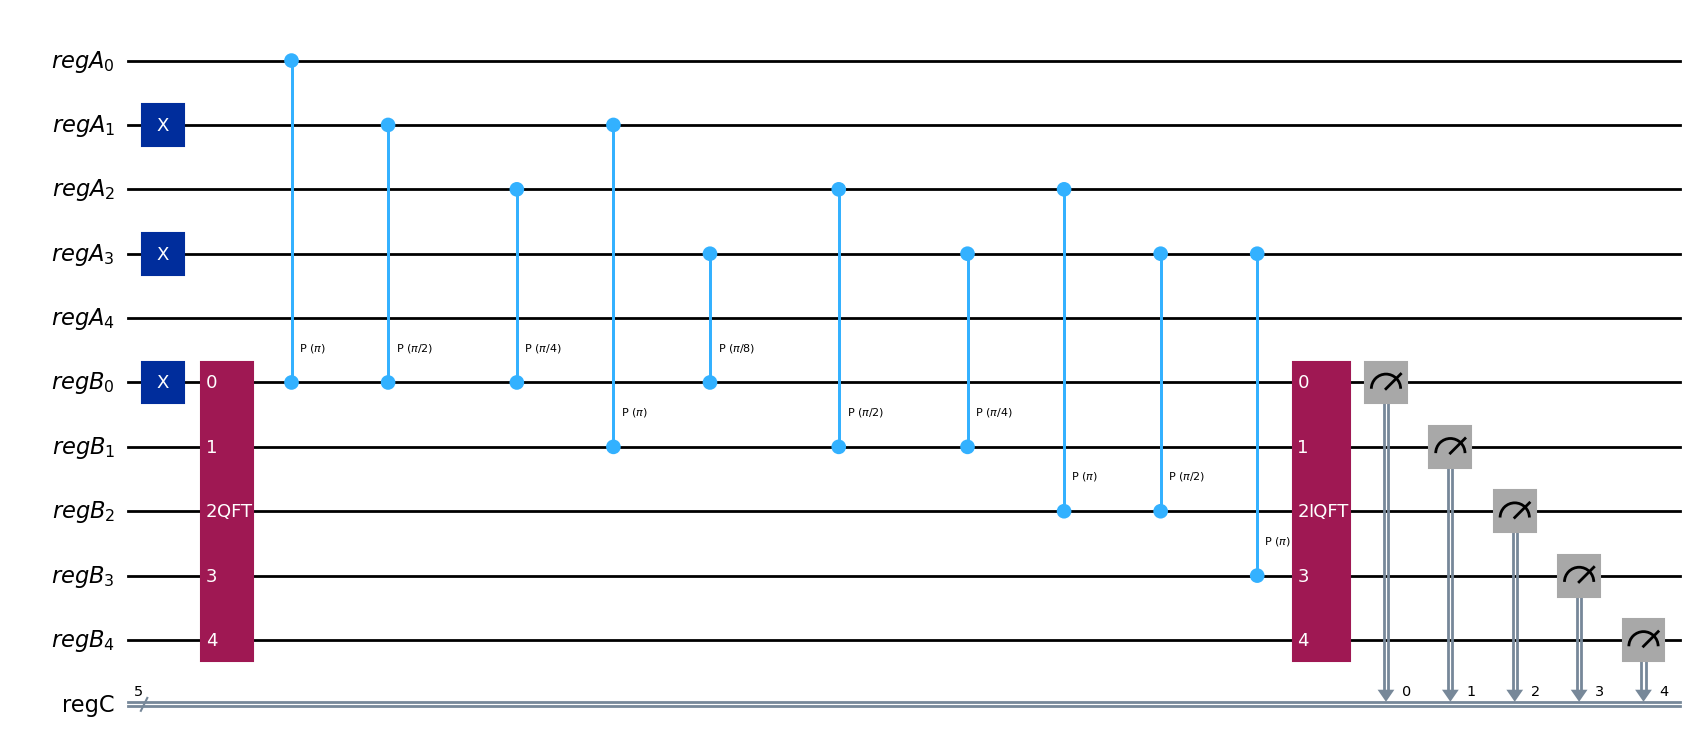

In [532]:

# Measure qubits
qc.measure(regB, regC)

# Transpile and simulate the circuit
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

# Extract and print the most probable output

print(counts)
# Draw circuit and plot histogram
qc.draw("mpl")
# plot_histogram(counts, title='QFT Quantum Addition')
